# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
!pip3 install --upgrade pandas

    100% |████████████████████████████████| 9.5MB 2.6MB/s eta 0:00:01    15% |█████                           | 1.5MB 28.2MB/s eta 0:00:01    27% |█████████                       | 2.7MB 26.9MB/s eta 0:00:01    40% |████████████▉                   | 3.8MB 25.0MB/s eta 0:00:01    51% |████████████████▍               | 4.9MB 23.4MB/s eta 0:00:01    76% |████████████████████████▌       | 7.3MB 25.4MB/s eta 0:00:01    88% |████████████████████████████▎   | 8.4MB 23.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.5MB/s eta 0:00:01   11% |███▌                            | 1.5MB 26.4MB/s eta 0:00:01    29% |█████████▍                      | 3.9MB 26.1MB/s eta 0:00:01    37% |████████████                    | 5.0MB 22.8MB/s eta 0:00:01    46% |██████████████▉                 | 6.2MB 25.9MB/s eta 0:00:01    92% |█████████████████████████████▋  | 12.4MB 21.1MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 18.5MB/s ta 0:00:01
tensorflow 1.3.0 requires tens

In [2]:
!pip3 install --upgrade numpy

Requirement already up-to-date: numpy in /opt/conda/lib/python3.6/site-packages (1.19.5)


In [3]:
#import packages to use in this project
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import tweepy as tw
import json
import os

In [4]:
archive_data=pd.read_csv('twitter-archive-enhanced.csv', sep=',')

In [5]:
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [7]:
img_predictions= pd.read_csv('image-predictions.tsv', sep="\t")

In [8]:
img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#read file into a variable
with open('tweet_json.txt') as f:
    a = f.readlines()
    
    #create an empty list
    data=[]
    
    #Append all elements in a into the list individually
for line in a:
    data.append(json.loads(line))
    
    #create a dataframe with data
    ad_data = pd.DataFrame(data)

In [10]:
ad_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Each data was displayed in the Jupyter Notebook inorder to visually assess data.

In [11]:
archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
ad_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


Now to Programmatic Assessment

In [14]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
#checking for duplicate data
archive_data.duplicated().sum()

0

In [16]:
archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
archive_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
archive_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
archive_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### img_predictions

In [21]:
img_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg    2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg    2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
                                                  ..
https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg    1
https://pbs.twimg.com/media/CvukbEkWAAAV-69.jpg    1
https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg    1
https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg    1
https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [22]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
img_predictions.duplicated().sum()

0

In [24]:
img_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### ad_data

In [25]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [26]:
ad_data.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [27]:
ad_data.shape

(2354, 31)

### Quality issues

#### Archive_data

1. Retweets are present in data and we don't want that

2. Timestamp datatype is object and should be datatime

3. Invalid names in archive_data less than 3 characters such as a and an

4. Ratings appear in different columns

5. Incorrect rating_denominator value

6. Irrelevant columns with null values


#### img_predictions

7. Character case inconsistency and underscores between names 

8. Missing values from img_predictions table. There are 2075 rows instead of 2356. Also some have two tweet_ids and those are probably retweets.

9. Columns related to breed, dog prediction and confidence level should all be placed in three columns.


#### ad_data

10. id column present rather than tweet_id to enable merge.

#### Tidiness issues
1. Source column appears messy

2. Dog stage is in four columns and that shouldn't be so.

3. The three tables ought to be merged into one dataset as they are related.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
#selecting only the columns relevant to my analysis
ad_data = ad_data[['id', 'retweet_count', 'favorite_count']]

In [29]:
# Make copies of original pieces of data
archive_clean= archive_data.copy()
predictions_clean= img_predictions.copy()
adData_clean = ad_data.copy()

### Issue #1: Retweets are present in data and we don't want that

#### Define: 


Remove all retweets

#### Code

In [30]:
#query for only entries with null values in retweet related columns
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [31]:
#testing code

print(archive_clean.retweeted_status_id.notnull().sum())
print(archive_clean.retweeted_status_user_id.notnull().sum())
print(archive_clean.retweeted_status_timestamp.notnull().sum())


0
0
0


### Issue #2: Incorrect Timestamp datatype

#### Define

 Timestamp datatype is object and should be datatime

#### Code

In [32]:
#change timestamp to datetime datatype
archive_data['timestamp']=pd.to_datetime(archive_data.timestamp)

#### Test

In [33]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: Invalid names in archive_data less than 3 characters such as a and an

#### Define: 


Find all names that aren't dog names such as a, an, very and change them to NaN and make them titlecase

#### Code

In [34]:
archive_clean.name.str.islower()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2175, dtype: bool

In [35]:
new = archive_clean.name.str.islower()
column_name ='name'
archive_clean.loc[new,column_name]= np.nan

In [36]:
#Fixing inconsistent character case
archive_clean.name=archive_clean.name.str.title()

#### Test

In [37]:
archive_clean.name.value_counts()


None       680
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Dotsy        1
Carper       1
Spencer      1
Miley        1
Arlo         1
Name: name, Length: 931, dtype: int64

### Issue #4: Ratings appear in different columns

#### Define: 


This should be fixed so ratings all appear in a single column

#### Code

In [38]:
archive_clean['rating'] = (archive_clean['rating_numerator'] / archive_clean['rating_denominator'])

In [39]:
archive_clean['rating'] = archive_clean['rating'].round(2)

#### Test

In [40]:
archive_clean['rating'].value_counts()

1.20      504
1.00      444
1.10      431
1.30      307
0.90      156
0.80       98
0.70       53
1.40       43
0.50       37
0.60       32
0.30       19
0.40       15
0.20       11
0.10        7
42.00       2
0.00        2
1.25        1
66.60       1
1.50        1
inf         1
7.50        1
18.20       1
0.64        1
0.73        1
0.82        1
2.70        1
3.43        1
1.70        1
2.60        1
177.60      1
Name: rating, dtype: int64

The output shows "inf" as a value and this is a quality issue. To fix this issue, I'll be dropping the entry with denominator equal to zero.

### Issue #5: Incorrect denominator values

#### Define: 


Drop the incorrect denominator value entry

#### Code

In [41]:
#Drop ratings_denominator equal to 0
archive_clean[archive_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,inf


In [42]:
#drop 
archive_clean = archive_clean.drop(labels = 313, axis = 0)

In [43]:
archive_clean = archive_clean.drop (['rating_numerator','rating_denominator'], axis = 1)

#### Test

In [44]:
#check to see if rating_numerator and rating_denominator is dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2174 non-null   int64  
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2174 non-null   object 
 4   source                      2174 non-null   object 
 5   text                        2174 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  name                        2070 non-null   object 
 11  doggo                       2174 non-null   object 
 12  floofer                     2174 non-null   object 
 13  pupper                      2174 

### Issue #6: Some columns have missing values and null objects

#### Code

In [45]:
archive_clean = archive_clean.drop(columns = ['retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'])

#### Test

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2174 non-null   int64  
 1   timestamp  2174 non-null   object 
 2   source     2174 non-null   object 
 3   text       2174 non-null   object 
 4   name       2070 non-null   object 
 5   doggo      2174 non-null   object 
 6   floofer    2174 non-null   object 
 7   pupper     2174 non-null   object 
 8   puppo      2174 non-null   object 
 9   rating     2174 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 186.8+ KB


### Source column appears messy

#### Define

Extract the string between href=""> and </a> in the source column

#### Code

In [60]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [61]:
archive_clean['source'].unique

<bound method Series.unique of 0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2174, dtype: object>

## img_predictions

### Issue 7:Character case inconsistency and underscores between names in img_predictions table 

Define: Character case inconsistency and underscores between names in img_predictions table

#### Code

In [47]:
predictions_clean['p1']=predictions_clean['p1'].str.replace('_',' ')
predictions_clean['p2']=predictions_clean['p2'].str.replace('_',' ')
predictions_clean['p3']=predictions_clean['p3'].str.replace('_',' ')



In [48]:
predictions_clean['p1']=predictions_clean['p1'].str.title()
predictions_clean['p2']=predictions_clean['p2'].str.title()
predictions_clean['p3']=predictions_clean['p3'].str.title()

#### Test

In [49]:
predictions_clean[['p1', 'p2', 'p3']].sample()

,p1,p2,p3
1645,Cocker Spaniel,Dandie Dinmont,English Setter


### Issue 9:Columns related to breed, dog prediction and confidence level should all be placed in two columns

Define: Create columns for breed and confidence_level

#### Code

In [50]:
#condition for selection

condition = [(predictions_clean['p1_dog']== True),
             (predictions_clean['p2_dog'] == True),
            (predictions_clean['p3_dog'] == True)]


In [51]:
breed = [predictions_clean['p1'],
        predictions_clean['p2'],
         predictions_clean['p3']]

In [52]:
confidence_level = [predictions_clean['p1_conf'],
                     predictions_clean['p2_conf'],
                    predictions_clean['p3_conf']]

In [53]:
predictions_clean['breed'] = np.select(condition, breed, default=None)

In [54]:
predictions_clean['confidence_level'] = np.select(condition, confidence_level,default=0)

In [55]:
#dropping the old columns
predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [56]:
#Now to convert the confidence level to percentage
predictions_clean.confidence_level = round(predictions_clean['confidence_level'] * 100, 2)

#### Test

In [57]:
predictions_clean.sample()

,tweet_id,jpg_url,img_num,breed,confidence_level
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,Golden Retriever,57.31


### adData 

#### Issue 10: id column present rather than tweet_id to enable merge.

#### Define: Rename id column to match tweet_id column name to enable merge

#### Code

In [58]:
adData_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [59]:
adData_clean.sample()

,tweet_id,retweet_count,favorite_count
264,842115215311396866,3386,15204


##Tidiness

### Issue 1: Dog stage is in four columns and that shouldn't be so.

#### Define

Put all four dog stages in one column and call it stage

#### Code

In [62]:
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [63]:
archive_clean.loc[archive_clean.stage =='NoneNoneNoneNone', 'stage'] = np.nan
archive_clean.loc[archive_clean.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
archive_clean.loc[archive_clean.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
archive_clean.loc[archive_clean.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
archive_clean.loc[archive_clean.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
archive_clean.loc[archive_clean.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggopuppo'
archive_clean.loc[archive_clean.stage == 'doggoNonepupperNone', 'stage'] = 'doggopupper'
archive_clean.loc[archive_clean.stage == 'doggoflooferNoneNone', 'stage'] = 'doggofloofer'

In [64]:
combo_stages = ['doggopupper','doggopuppo', 'doggofloofer']



In [65]:
for stage in archive_clean.stage:
    if stage in combo_stages:
        archive_clean['stage'] = archive_clean['stage'].replace(combo_stages, 'numerous')

In [66]:
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [67]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'rating', 'stage'], dtype='object')

In [68]:
archive_clean.stage.value_counts()

pupper      224
doggo        75
puppo        24
numerous     12
floofer       9
Name: stage, dtype: int64

#### Issue 2: Merge all three tables 

#### Code

In [69]:
master_df = pd.merge(archive_clean, adData_clean, on='tweet_id')
master_df = pd.merge(master_df, predictions_clean, on='tweet_id')

#### Test

In [70]:
master_df.head()

,tweet_id,timestamp,source,text,name,rating,stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,0.00
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,1.3,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,1.3,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,16.81
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,55.57


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
#saving master dataset
master_df.to_csv('twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Question 1: What is the most pupular dog name

In [72]:
master_df.name.value_counts()

None       546
Charlie     11
Oliver      10
Lucy        10
Cooper      10
          ... 
Spencer      1
Miley        1
Rontu        1
Scott        1
Rose         1
Name: name, Length: 914, dtype: int64

#### Question 2: What is the most retweeted tweet?

In [73]:
master_df['retweet_count'].nlargest()

775    79515
400    56625
810    52360
309    48265
58     45849
Name: retweet_count, dtype: int64

In [74]:
master_df.iloc[775]

tweet_id                                           744234799360020481
timestamp                                   2016-06-18 18:26:18 +0000
source                                             Twitter for iPhone
text                Here's a doggo realizing you can stand in a po...
name                                                             None
rating                                                            1.3
stage                                                           doggo
retweet_count                                                   79515
favorite_count                                                 131075
jpg_url             https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                             1
breed                                              Labrador Retriever
confidence_level                                                82.53
Name: 775, dtype: object

#### Question 3: Is there a relationship betweeen retweets and favourites

<function matplotlib.pyplot.show(*args, **kw)>

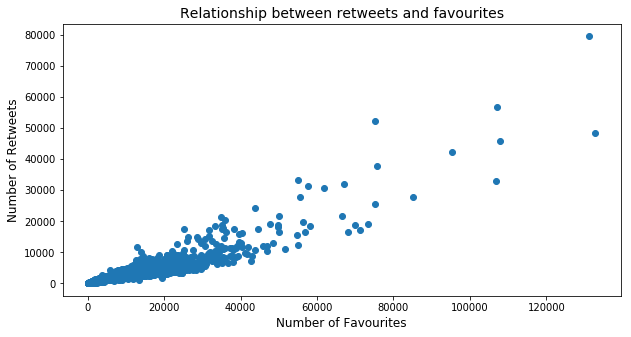

In [75]:
fig = plt.figure(figsize=(10,5))
plt.scatter(master_df['favorite_count'], master_df['retweet_count'])
plt.title('Relationship between retweets and favourites', fontsize= 14)
plt.xlabel('Number of Favourites', fontsize = 12)
plt.ylabel('Number of Retweets', fontsize = 12)

plt.show

### Insights:
1. The three most popular dog Names are Lucy, Charlie and olive

2. The most retweeted tweet is the tweet with id of 744234799360020481

3. There is a positive correlation between Retweets and Favourites

### Visualization

#### Question; What is the most popular dog breed?

In [76]:
popular_dog_breed = master_df.groupby('breed')['tweet_id'].count()
popular_dog_breed = popular_dog_breed.sort_values(ascending=False)


In [77]:
popular_dog_breed = popular_dog_breed.head(5)

In [78]:
popular_dog_breed

breed
Golden Retriever      158
Labrador Retriever    108
Pembroke               95
Chihuahua              91
Pug                    62
Name: tweet_id, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

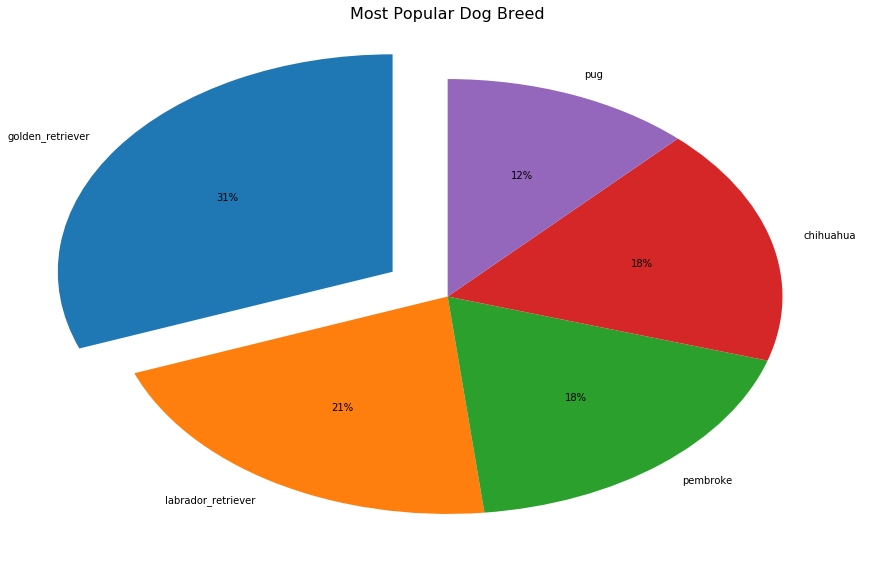

In [79]:
label=['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua', 'pug']
explode_fig = [0.2,0,0,0,0]

fig=plt.figure(figsize=(15,10))
plt.pie(popular_dog_breed, labels = label, startangle=90, explode=explode_fig, autopct='%.0f%%')
plt.title('Most Popular Dog Breed', fontsize=16)

plt.show